# PROBLEM STATEMENT :-
#### Linear regression by using Deep Neural Network: Implement Boston Housing Price Prediction Problem by Linear Regression using Deep Neural Network. Use Boston House Price Prediction Dataset.

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Loading Dataset

In [2]:
df=pd.read_csv('./HousingData.csv')

## Dataset Statistics

In [3]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,NaN,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [4]:
df.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX          int64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object

In [5]:
df.ndim

2

In [6]:
df.info

<bound method DataFrame.info of         CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  \
0    0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900    1  296   
1    0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671    2  242   
2    0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671    2  242   
3    0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622    3  222   
4    0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622    3  222   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...  ...   
501  0.06263   0.0  11.93   0.0  0.573  6.593  69.1  2.4786    1  273   
502  0.04527   0.0  11.93   0.0  0.573  6.120  76.7  2.2875    1  273   
503  0.06076   0.0  11.93   0.0  0.573  6.976  91.0  2.1675    1  273   
504  0.10959   0.0  11.93   0.0  0.573  6.794  89.3  2.3889    1  273   
505  0.04741   0.0  11.93   0.0  0.573  6.030   NaN  2.5050    1  273   

     PTRATIO       B  LSTAT  MEDV  
0       15.3  396.90   4.98  24.0  
1       17.8  396.9

In [7]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,486.000000,486.000000,486.000000,486.000000,506.000000,506.000000,486.000000,506.000000,506.000000,506.000000,506.000000,506.000000,486.000000,506.000000
mean,3.611874,11.211934,11.083992,0.069959,0.554695,6.284634,68.518519,3.795043,9.549407,408.237154,18.455534,356.674032,12.715432,22.532806
std,8.720192,23.388876,6.835896,0.255340,0.115878,0.702617,27.999513,2.105710,8.707259,168.537116,2.164946,91.294864,7.155871,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081900,0.000000,5.190000,0.000000,0.449000,5.885500,45.175000,2.100175,4.000000,279.000000,17.400000,375.377500,7.125000,17.025000
50%,0.253715,0.000000,9.690000,0.000000,0.538000,6.208500,76.800000,3.207450,5.000000,330.000000,19.050000,391.440000,11.430000,21.200000
75%,3.560263,12.500000,18.100000,0.000000,0.624000,6.623500,93.975000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [8]:
df.shape

(506, 14)

In [9]:
df.size

7084

## Checking for Missing Values in Dataset

In [10]:
df.isnull()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,False,False,False,False,False,False,False,False,False,False,False,False,True,False
502,False,False,False,False,False,False,False,False,False,False,False,False,False,False
503,False,False,False,False,False,False,False,False,False,False,False,False,False,False
504,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [11]:
df.isnull().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

In [12]:
df.isnull().sum().sum()

120

## Filling Missing Values in Dataset

In [13]:
col_means=df.mean()
df=df.fillna(col_means)

In [14]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [15]:
df.isnull().sum().sum()

0

## Separating Features and Target

In [16]:
x=df.drop('MEDV',axis=1)
y=df['MEDV']

In [17]:
x

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.200000,4.0900,1,296,15.3,396.90,4.980000
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.900000,4.9671,2,242,17.8,396.90,9.140000
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.100000,4.9671,2,242,17.8,392.83,4.030000
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.800000,6.0622,3,222,18.7,394.63,2.940000
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.200000,6.0622,3,222,18.7,396.90,12.715432
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.100000,2.4786,1,273,21.0,391.99,12.715432
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.700000,2.2875,1,273,21.0,396.90,9.080000
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.000000,2.1675,1,273,21.0,396.90,5.640000
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.300000,2.3889,1,273,21.0,393.45,6.480000


In [18]:
y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: MEDV, Length: 506, dtype: float64

## Splitting Dataset into Train and Test Split

In [19]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [20]:
x_train

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
178,0.06642,0.000000,4.05,0.0,0.510,6.860,74.4,2.9153,5,296,16.6,391.27,6.920000
102,0.22876,0.000000,8.56,0.0,0.520,6.405,85.4,2.7147,5,384,20.9,70.80,10.630000
378,23.64820,0.000000,18.10,0.0,0.671,6.380,96.2,1.3861,24,666,20.2,396.90,23.690000
350,0.06211,11.211934,1.25,0.0,0.429,6.490,44.4,8.7921,1,335,19.7,396.90,12.715432
243,0.12757,30.000000,4.93,0.0,0.428,6.393,7.8,7.0355,6,300,16.6,374.71,5.190000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
420,11.08740,0.000000,18.10,0.0,0.718,6.411,100.0,1.8589,24,666,20.2,318.75,15.020000
180,0.06588,0.000000,2.46,0.0,0.488,7.765,83.3,2.7410,3,193,17.8,395.56,7.560000
89,0.05302,0.000000,3.41,0.0,0.489,7.079,63.1,3.4145,2,270,17.8,396.06,5.700000
498,0.23912,0.000000,9.69,0.0,0.585,6.019,65.3,2.4091,6,391,19.2,396.90,12.920000


In [21]:
x_test

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
144,2.77974,0.0,19.58,0.0,0.871,4.903,97.8,1.3459,5,403,14.7,396.90,29.29
417,25.94060,0.0,18.10,0.0,0.679,5.304,89.1,1.6475,24,666,20.2,127.36,26.64
377,9.82349,0.0,18.10,0.0,0.671,6.794,98.8,1.3580,24,666,20.2,396.90,21.24
497,0.26838,0.0,9.69,0.0,0.585,5.794,70.6,2.8927,6,391,19.2,396.90,14.10
317,0.24522,0.0,9.90,0.0,0.544,5.782,71.7,4.0317,4,304,18.4,396.90,15.94
...,...,...,...,...,...,...,...,...,...,...,...,...,...
308,0.49298,0.0,9.90,0.0,0.544,6.635,82.5,3.3175,4,304,18.4,396.90,4.54
470,4.34879,0.0,18.10,0.0,0.580,6.167,84.0,3.0334,24,666,20.2,396.90,16.29
135,0.55778,0.0,21.89,0.0,0.624,6.335,98.2,2.1107,4,437,21.2,394.67,16.96
201,0.03445,82.5,2.03,0.0,0.415,6.162,38.4,6.2700,2,348,14.7,393.77,7.43


In [22]:
y_train

178    29.9
102    18.6
378    13.1
350    22.9
243    23.7
       ... 
420    16.7
180    39.8
89     28.7
498    21.2
330    19.8
Name: MEDV, Length: 354, dtype: float64

In [23]:
y_test

144    11.8
417    10.4
377    13.3
497    18.3
317    19.8
       ... 
308    22.8
470    19.9
135    18.1
201    24.1
289    24.8
Name: MEDV, Length: 152, dtype: float64

## Feature Scaling by Min-Max Normalization

In [24]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [25]:
x_train

array([[6.44732426e-04, 0.00000000e+00, 1.22592593e-01, ...,
        4.25531915e-01, 9.85803621e-01, 1.38696255e-01],
       [2.46945108e-03, 0.00000000e+00, 2.89629630e-01, ...,
        8.82978723e-01, 1.77719502e-01, 2.41608877e-01],
       [2.65706417e-01, 0.00000000e+00, 6.42962963e-01, ...,
        8.08510638e-01, 1.00000000e+00, 6.03883495e-01],
       ...,
       [4.94115018e-04, 0.00000000e+00, 9.88888889e-02, ...,
        5.53191489e-01, 9.97881890e-01, 1.04854369e-01],
       [2.58589857e-03, 0.00000000e+00, 3.31481481e-01, ...,
        7.02127660e-01, 1.00000000e+00, 3.05131761e-01],
       [4.08915022e-04, 1.12119342e-01, 9.25925926e-02, ...,
        4.57446809e-01, 9.28564224e-01, 1.98890430e-01]])

In [26]:
x_test

array([[3.11427343e-02, 0.00000000e+00, 6.97777778e-01, ...,
        2.23404255e-01, 1.00000000e+00, 7.59223301e-01],
       [2.91473234e-01, 0.00000000e+00, 6.42962963e-01, ...,
        8.08510638e-01, 3.20338898e-01, 6.85714286e-01],
       [1.10315224e-01, 0.00000000e+00, 6.42962963e-01, ...,
        8.08510638e-01, 1.00000000e+00, 5.35922330e-01],
       ...,
       [6.16767045e-03, 0.00000000e+00, 7.83333333e-01, ...,
        9.14893617e-01, 9.94376923e-01, 4.17198336e-01],
       [2.85386267e-04, 8.25000000e-01, 4.77777778e-02, ...,
        2.23404255e-01, 9.92107519e-01, 1.52843273e-01],
       [3.81151962e-04, 5.25000000e-01, 1.69629630e-01, ...,
        4.25531915e-01, 9.36507136e-01, 2.10540915e-01]])

## Building the Deep Neural Network Model

In [27]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
model=Sequential()
model.add(Dense(128,activation='relu'))
model.add(Dense(1,activation='linear'))

## Model Compilation

In [28]:
model.compile(loss='mae',optimizer='adam',metrics=['mse','mae'])

## Model Training

In [29]:
model.fit(x_train,y_train,epochs=100)

Epoch 1/100
12/12 [==============================] - 0s 660us/step - loss: 22.6893 - mse: 603.9318 - mae: 22.6893
Epoch 2/100
12/12 [==============================] - 0s 662us/step - loss: 22.1013 - mse: 578.5657 - mae: 22.1013
Epoch 3/100
12/12 [==============================] - 0s 650us/step - loss: 21.4325 - mse: 549.9609 - mae: 21.4325
Epoch 4/100
12/12 [==============================] - 0s 506us/step - loss: 20.5953 - mse: 516.4094 - mae: 20.5953
Epoch 5/100
12/12 [==============================] - 0s 680us/step - loss: 19.5560 - mse: 477.5211 - mae: 19.5560
Epoch 6/100
12/12 [==============================] - 0s 501us/step - loss: 18.3378 - mse: 432.4661 - mae: 18.3378
Epoch 7/100
12/12 [==============================] - 0s 591us/step - loss: 16.9572 - mse: 385.1786 - mae: 16.9572
Epoch 8/100
12/12 [==============================] - 0s 507us/step - loss: 15.4857 - mse: 337.4019 - mae: 15.4857
Epoch 9/100
12/12 [==============================] - 0s 498us/step - loss: 14.0706 - mse

## Model Evaluation

In [30]:
training_metrics=model.evaluate(x_train,y_train)

12/12 [==============================] - 0s 509us/step - loss: 3.6293 - mse: 29.8466 - mae: 3.6293


In [31]:
training_metrics

[3.6292834281921387, 29.846635818481445, 3.6292834281921387]

In [32]:
testing_metrics=model.evaluate(x_test,y_test)

5/5 [==============================] - 0s 830us/step - loss: 3.3209 - mse: 27.8263 - mae: 3.3209


In [33]:
testing_metrics

[3.320941686630249, 27.826261520385742, 3.320941686630249]

## Model Prediction

In [34]:
y_pred=model.predict(x_test)

5/5 [==============================] - 0s 807us/step


In [35]:
y_pred

array([[12.800409 ],
       [ 6.988299 ],
       [18.443674 ],
       [19.544909 ],
       [19.189695 ],
       [28.134354 ],
       [31.23699  ],
       [34.983093 ],
       [27.339312 ],
       [20.791988 ],
       [18.194952 ],
       [24.525827 ],
       [21.544056 ],
       [16.62794  ],
       [ 8.195784 ],
       [16.022135 ],
       [27.815332 ],
       [12.886978 ],
       [18.496733 ],
       [12.24621  ],
       [32.711315 ],
       [30.756815 ],
       [20.820154 ],
       [23.376669 ],
       [19.839579 ],
       [19.464436 ],
       [19.709715 ],
       [19.07944  ],
       [21.460754 ],
       [30.1403   ],
       [23.98334  ],
       [28.777166 ],
       [24.89332  ],
       [21.738213 ],
       [24.579824 ],
       [33.2794   ],
       [24.12832  ],
       [34.100746 ],
       [22.559721 ],
       [19.736568 ],
       [24.921824 ],
       [29.612972 ],
       [16.88967  ],
       [13.408051 ],
       [21.681206 ],
       [12.762032 ],
       [22.046549 ],
       [17.19

## Reshaping for Plotting

In [36]:
y_test=np.array(y_test).reshape(-1,1)

In [37]:
y_test

array([[11.8],
       [10.4],
       [13.3],
       [18.3],
       [19.8],
       [21.9],
       [36. ],
       [21.9],
       [33. ],
       [21.7],
       [50. ],
       [22.8],
       [21. ],
       [14.2],
       [ 8.3],
       [27.9],
       [22. ],
       [14.6],
       [20. ],
       [ 7. ],
       [44.8],
       [36.5],
       [18.9],
       [24.1],
       [19.3],
       [20.3],
       [23.2],
       [18.4],
       [18.2],
       [31. ],
       [22.7],
       [22.5],
       [24.6],
       [24.7],
       [25. ],
       [35.4],
       [23. ],
       [50. ],
       [21.7],
       [18.2],
       [22.9],
       [23.5],
       [14.8],
       [13.8],
       [20.4],
       [13.4],
       [19.8],
       [12.1],
       [31.2],
       [15. ],
       [20.3],
       [20.9],
       [19.9],
       [17.8],
       [20.1],
       [21.6],
       [24.1],
       [16.1],
       [ 8.1],
       [26.4],
       [15.6],
       [23.2],
       [31.6],
       [17.1],
       [14.5],
       [17.4],
       [26

## Model Visualization
#### Plotting Actual Values v/s Predicted Values

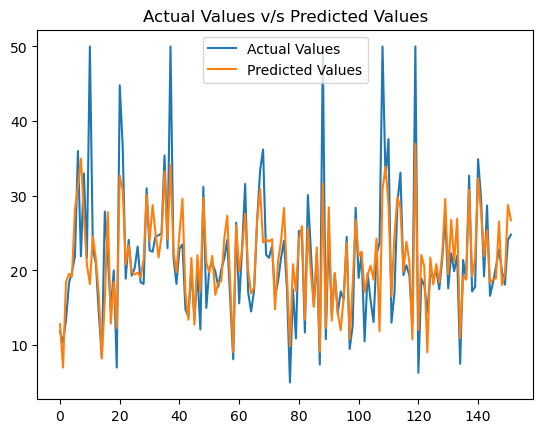

In [38]:
plt.plot(y_test,label='Actual Values')
plt.plot(y_pred,label='Predicted Values')
plt.title('Actual Values v/s Predicted Values')
plt.legend()
plt.show()